# Домашнее задание 34 
### Козел А.Г. 15.04.2023 

Применить в любой задачи из ДЗ (например в задачи где мы определяли возраст) механизм внимания (слой MultiheadAttention) в место основного или вместе с основным телом модели. 
Цель - попробовать применять данный слой. 

	

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding, Dropout

In [2]:
import sys
import sklearn

import numpy as np
import os
import random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from imutils import face_utils
import imutils
import dlib
import pandas as pd
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split



In [3]:
tf.__version__
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
data = 'c:\\Users\\37533\\Desktop\\jupyter\\ДЗ_28\\data_'

In [ ]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from tqdm import tqdm

# Загрузка данных 
Так как прошлый раз фильтрацияданных заняла много времени, уже больше не повторяла. В первом случае за счет проверки нечитаемых данных времени очень много тратилось, во втором быстрее. 

In [ ]:
face = 0 # счетчик изображений с лицами
no_face = 0 #счетчик изображений без лиц
no_read = 0 # счетчик нечитаемых изображений

df = pd.DataFrame(columns=['link', 'age'])
for folder in tqdm(os.listdir('./data_')):
    for file in os.listdir(os.path.join(data, folder)):
        try:
            link = os.path.join(data, folder, file)
            img = Image.open(link)  # загрузить изображение
            image = face_recognition.load_image_file(os.path.join(data, folder, file))
            if len(face_recognition.face_landmarks(image)) == 1:
                face +=1
                #определяем возраст
                name = file[:-4] #убираем расширение файла из имени
                age_end = name.split('_')[2] # делаем сплит по нижнему подчеркиванию и выбираем последнюю дату
                age_start=str(name.split('_')[1]).split('-')[0] # делаем сплит, выбираем первую дату и далаем сплит по дефису, 
                                                            # выбираем год.
                age_fin = int(age_end)-int(age_start) #Вычисляем возраст
            
                if age_fin>100 or age_fin<0: # Если возраст больше 100 или меньше 0, то выкидываем из набора
                    continue
             
            else:
                no_face +=1
            #формируем временный датафрейм
            dat = pd.DataFrame({"link": [link],
                                "age": [age_fin]})
               #Делаем конкатенацию с основным датафреймом.
            df = pd.concat([df,dat])
            
        except:
            no_read+=1
            None 
        
print(f'Изображения с лицами {face}')
print(f'Изображения без лиц {no_face}')
print(f'Нечитаемые изображения {no_read}')

df.to_csv('data_cleaned.csv') #Сохраним в файл полученный Dataframe на случай перезагрузки, чтобы не чистить второй раз )))

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
face1 = 0 # счетчик изображений с лицами
no_face1 = 0 #счетчик изображений без лиц


df1 = pd.DataFrame(columns=['link', 'age'])
for folder in tqdm(os.listdir('./data_')):   
    for file in os.listdir(os.path.join(data, folder)):
        link = os.path.join(data, folder, file) 
        img = Image.open(link)  # загрузить изображение
        image = face_recognition.load_image_file(os.path.join(data, folder, file))
        if len(face_recognition.face_landmarks(image)) == 1:
            face1 +=1 #если 1 лицо найдено, добавляем +1
                #определяем возраст
            name = file[:-4] #убираем расширение файла из имени
            age_end = name.split('_')[2] # делаем сплит по нижнему подчеркиванию и выбираем последнюю дату
            age_start=str(name.split('_')[1]).split('-')[0] # делаем сплит, выбираем первую дату и далаем сплит по дефису, 
                                                            # выбираем год.
            age_fin = int(age_end)-int(age_start) #Вычисляем возраст
            
            if age_fin>100 or age_fin<0:# Если возраст больше 100 или меньше 0, то выкидываем из набора
                continue
            dat = pd.DataFrame({"link": [link],
                             "age": [age_fin]})
               #Делаем конкатенацию с основным датафреймом.
            df1 = pd.concat([df1,dat])
             
        else:
            no_face1 +=1
            #формируем временный датафрейм
        
        
print(f'Изображения с лицами {face1}')
print(f'Изображения без лиц {no_face1}')


df1.to_csv('data_face.csv') #Сохраним в файл полученный Dataframe 

Использую уже дальше сохраненный при первом запуске Dataframe

## Анализ данных

In [5]:
df1 = pd.read_csv ('data_face.csv')

<AxesSubplot: >

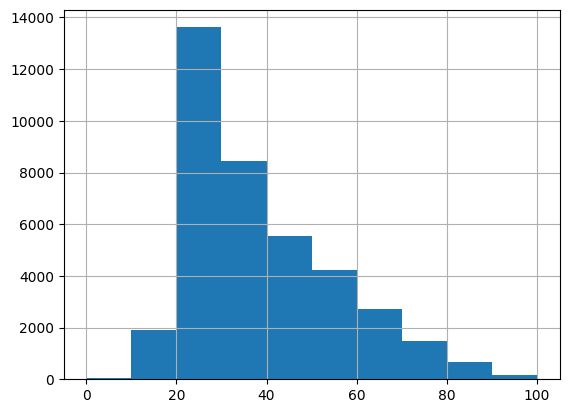

In [6]:
df1['age'].hist()

In [7]:
df1.head(5)

,Unnamed: 0,link,age
0,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,67
1,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,27
2,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,46
3,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,43
4,0,c:\Users\37533\Desktop\jupyter\ДЗ_28\data_\00\...,48


In [8]:
df1.nunique()

Unnamed: 0        1
link          38820
age             101
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38820 entries, 0 to 38819
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  38820 non-null  int64 
 1   link        38820 non-null  object
 2   age         38820 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 910.0+ KB


In [10]:
df1['age'].value_counts()

26    1612
24    1561
27    1519
23    1488
25    1478
      ... 
3        3
98       3
5        1
2        1
4        1
Name: age, Length: 101, dtype: int64

In [11]:
print(df1.shape)
df1['age'].describe(include = "all").T

(38820, 3)


count    38820.000000
mean        38.340752
std         16.608884
min          0.000000
25%         25.000000
50%         33.000000
75%         49.000000
max        100.000000
Name: age, dtype: float64

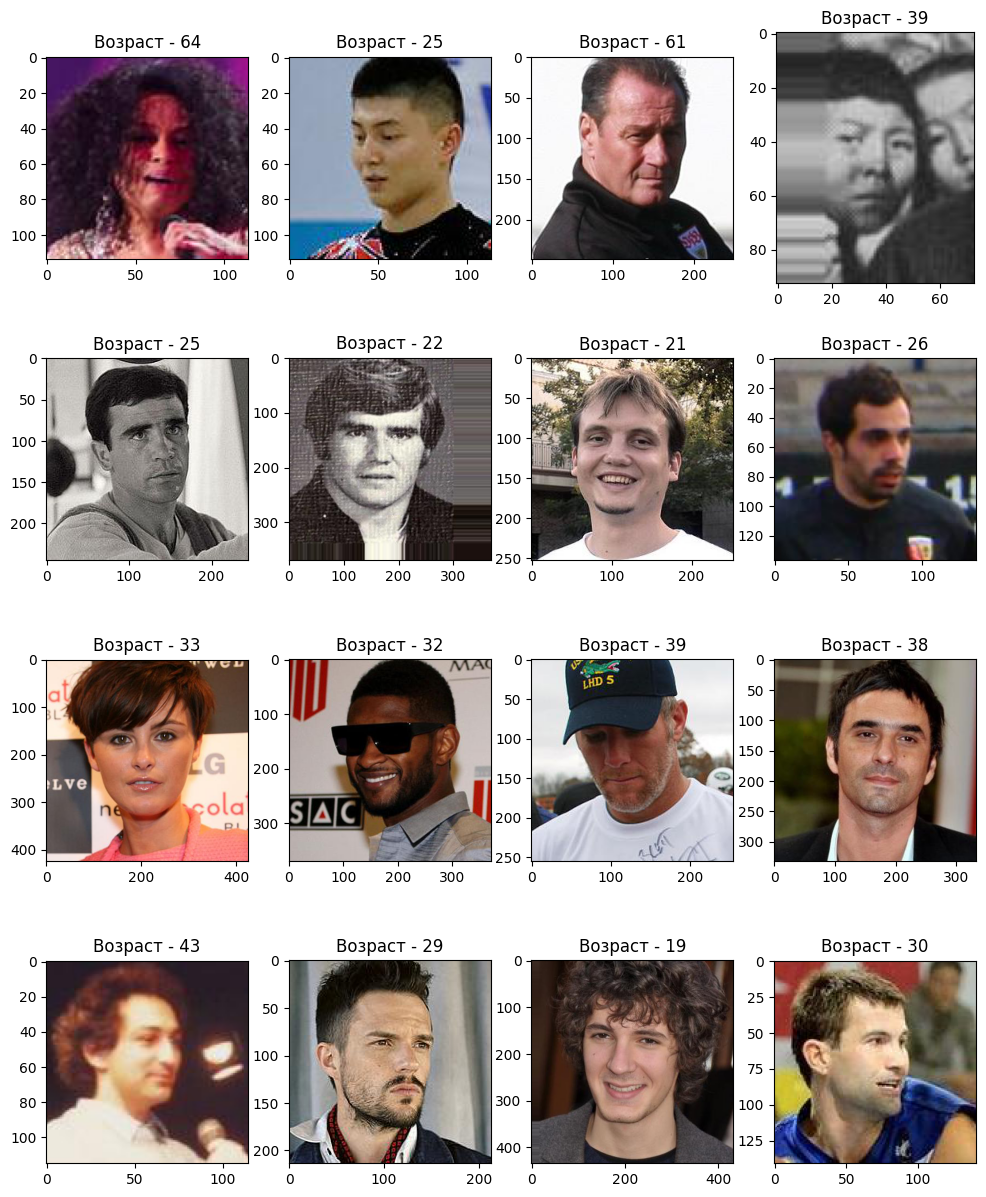

In [12]:
idx = np.random.randint (0,len(df1),16)
plt.figure(figsize=(12,15))
for idx in enumerate(idx):
    plt.subplot (4,4,idx[0]+1)
    link = df1.iloc[idx[1]]
    image = plt.imread(link[1])
    plt.title ('Возраст - ' + str(link[2]))
    plt.imshow(image, cmap='gray');
    

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import RootMeanSquaredError


In [14]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding,\
                                    Dropout, BatchNormalization, AveragePooling2D, GlobalMaxPool2D, MultiHeadAttention, Input
from tensorflow.keras.models import Model

## Модель 1

In [15]:
train, test = train_test_split(df1, test_size=0.2, random_state=34)


In [16]:
train_datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.3)
test_datagen=ImageDataGenerator(rescale=1./255.)


In [17]:
TARGET_SIZE = (128,128)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train,
directory="./",
x_col="link",
y_col="age",
subset="training",
batch_size=12,
seed=42,
shuffle=True,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

valid_generator=train_datagen.flow_from_dataframe(
dataframe=train,
directory="./",
x_col="link",
y_col="age",
subset="validation",
batch_size=12,
seed=42,
shuffle=True,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="./",
x_col="link",
y_col="age",
batch_size=12,
seed=42,
shuffle=False,
class_mode="raw",
color_mode='rgb',
target_size=TARGET_SIZE)

Found 21740 validated image filenames.
Found 9316 validated image filenames.
Found 7764 validated image filenames.


In [20]:
input_layer = Input(shape=(128,128,3))

conv_l1 = Conv2D(32, (3,3), padding='same', activation='relu')(input_layer)
max_pl1 = MaxPooling2D(pool_size=(2,2), strides=2)(conv_l1)

conv_l2 = Conv2D(64, (3,3), padding='same', activation='relu')(max_pl1)
max_p2 = MaxPooling2D(pool_size=(2,2), strides=2)(conv_l2)

conv_l3 = Conv2D(128, (3,3), padding='same', activation='relu')(max_p2)
max_pl3 = MaxPooling2D(pool_size=(2,2), strides=2)(conv_l3)

conv_l4 = Conv2D(256, (3,3), padding='same', activation='relu')(max_pl3)
max_pl4 = MaxPooling2D(pool_size=(2,2), strides=2)(conv_l4)

conv_l5 = Conv2D(512, (3,3), padding='same', activation='relu')(max_pl4)
max_pl5 = MaxPooling2D(pool_size=(2,2), strides=2)(conv_l5)

global_max_pool = GlobalMaxPool2D()(max_pl5)

dense_1 = Dense(1024, activation='relu')(global_max_pool)

drop_1 = Dropout(0.7)(dense_1)
multi_head = MultiHeadAttention(num_heads=12, key_dim=256, attention_axes=(0, 1))(drop_1, drop_1)
drop_2 = Dropout(0.5)(multi_head)

dense_2 = Dense(512, activation='relu')(global_max_pool)
output_layer = Dense(1, activation='linear')(dense_2)


model = Model(inputs=input_layer, outputs=output_layer)


In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       7385

In [22]:
model.compile(optimizer = Adam(),loss="mse", metrics=["mae"])

In [23]:
lr_scheduler = ReduceLROnPlateau(factor=0.2, patience=2)

checkpoint_cb = ModelCheckpoint("ConvModel.h5", 
                                     monitor = "val_loss",
                                     save_best_only=True)

In [24]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    callbacks=[checkpoint_cb, lr_scheduler],
                    epochs=20)

Epoch 1/20
1812/1812 [==============================] - 114s 61ms/step - loss: 274.7611 - mae: 13.0325 - val_loss: 213.0758 - val_mae: 11.7986 - lr: 0.0010
Epoch 2/20
1812/1812 [==============================] - 112s 62ms/step - loss: 215.1686 - mae: 11.3894 - val_loss: 225.1244 - val_mae: 12.5471 - lr: 0.0010
Epoch 3/20
1812/1812 [==============================] - 112s 62ms/step - loss: 189.4926 - mae: 10.6525 - val_loss: 163.3468 - val_mae: 9.8657 - lr: 0.0010
Epoch 4/20
1812/1812 [==============================] - 114s 63ms/step - loss: 164.9372 - mae: 9.8571 - val_loss: 153.7928 - val_mae: 9.6040 - lr: 0.0010
Epoch 5/20
1812/1812 [==============================] - 111s 61ms/step - loss: 143.4833 - mae: 9.2089 - val_loss: 151.1506 - val_mae: 9.3729 - lr: 0.0010
Epoch 6/20
1812/1812 [==============================] - 111s 61ms/step - loss: 130.5626 - mae: 8.7350 - val_loss: 153.9093 - val_mae: 9.6306 - lr: 0.0010
Epoch 7/20
1812/1812 [==============================] - 112s 62ms/step 

In [25]:
model.evaluate (test_generator)

647/647 [==============================] - 22s 33ms/step - loss: 142.6866 - mae: 8.9132


[142.6865692138672, 8.913201332092285]

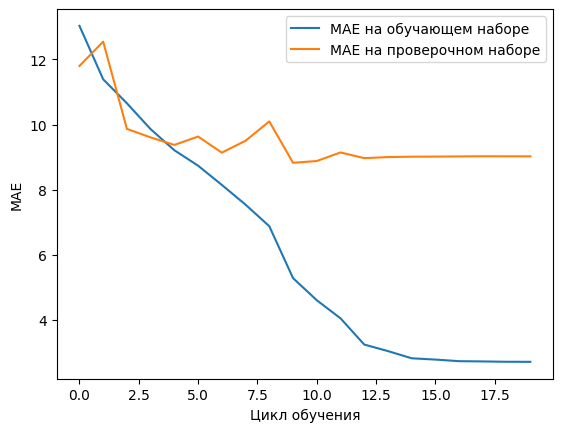

In [26]:
plt.plot(history.history['mae'], label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'], label='MAE на проверочном наборе')
plt.xlabel('Цикл обучения')
plt.ylabel('MAE')
plt.legend()
plt.show()

1/1 [==============================] - 0s 44ms/step


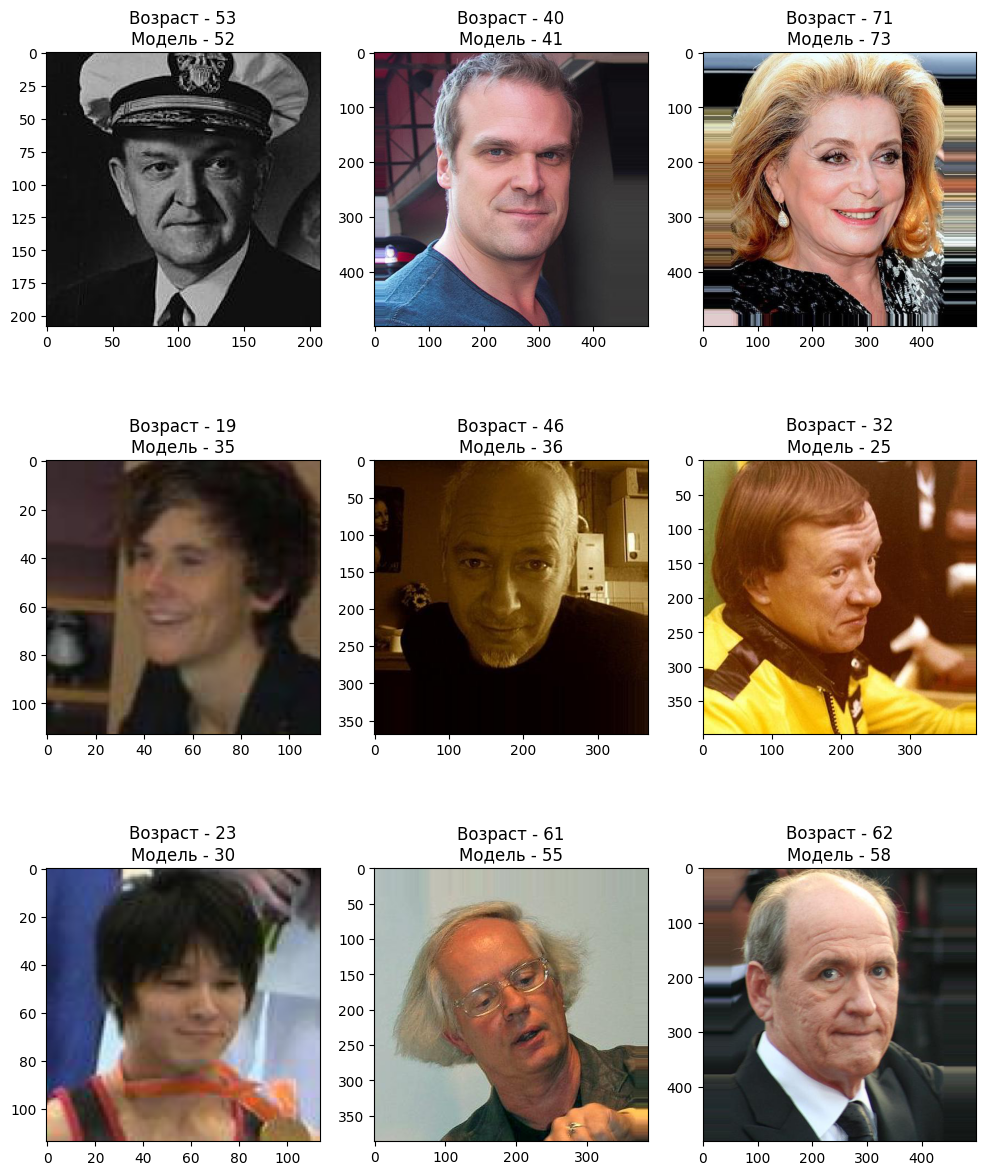

In [39]:
idx = np.random.randint (0,len(df1),9)
plt.figure(figsize=(12,15))
for idx in enumerate(idx):
    plt.subplot (3,3,idx[0]+1)
    link = df1.iloc[idx[1]]
    image = plt.imread(link[1])
    img_resized = cv2.resize (image, (128,128))/255
    img_reshaped  = img_resized.reshape (1,128,128,3)
    predict = model.predict(img_reshaped)[0][0];
    title = 'Возраст - ' + str(link[2]) + '\nМодель - ' + str(int(predict))
    plt.title (title)
    plt.imshow(image, cmap='gray');

### Вывод
Изменила в генераторе TARGET_SIZE с (224,224) на (128,128) и batch_size с 32 на 12, после слоя внимания добавила 1 линейный слой. Ситуация улучшилась, модель заработала, при это гораздо быстрее стала обучаться.
Пыталась убрать Dropout перед слоем внимания, пораметр оси внимания -1 меняла - выдавало ошибку, поэтому оставила так.

На фотографиях хорошего качества модель гораздо лучше определяет возраст (mae = 8.913201332092285 на проверочном наборе). Возможно, необходимо было убрать из набора данных фотографии плохого качества.